# Klasifikasi Berita menggunakan Fitur Latent Dirichlet Allocation

In [1]:
import pandas as pd
data = pd.read_csv('hasil_preprocessing_berita_supe.csv')

# Tampilkan kolom utama dari file Anda
data[['isi', 'hasil_preprocessing', 'kategori']].head()

,isi,hasil_preprocessing,kategori
0,PebasketSatria MudaAvan Seputramengaku terkeju...,"['pebasketsatria', 'mudaavan', 'seputramengaku...",Lainnya
1,Timnas Indonesiasudah gagal lolos kePiala Duni...,"['timnas', 'indonesiasudah', 'gagal', 'lolos',...",Lainnya
2,Sejak pertama kali diperkenalkan pada tahun 19...,"['kali', 'kenal', 'mercedesbenz', 'sprinter', ...",Lainnya
3,Ada banyak dosen inspiratif di Indonesia. Seba...,"['dosen', 'inspiratif', 'indonesia', 'jajar', ...",Edu
4,Kylian Mbappemengaku merasa lebih tenang sejak...,"['kylian', 'mbappemengaku', 'tenang', 'pindah'...",Lainnya


In [2]:
# Gunakan kolom teks bersih Anda
# 'hasil_preprocessing' pada file Anda berisi token hasil preprocessing
# Kita simpan sebagai kolom tunggal untuk analisis

data_text = data[['hasil_preprocessing']]

data_text.head()

,hasil_preprocessing
0,"['pebasketsatria', 'mudaavan', 'seputramengaku..."
1,"['timnas', 'indonesiasudah', 'gagal', 'lolos',..."
2,"['kali', 'kenal', 'mercedesbenz', 'sprinter', ..."
3,"['dosen', 'inspiratif', 'indonesia', 'jajar', ..."
4,"['kylian', 'mbappemengaku', 'tenang', 'pindah'..."


In [3]:
data_text['index'] = data_text.index

documents = data_text
documents.head()

/tmp/ipython-input-118329293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


,hasil_preprocessing,index
0,"['pebasketsatria', 'mudaavan', 'seputramengaku...",0
1,"['timnas', 'indonesiasudah', 'gagal', 'lolos',...",1
2,"['kali', 'kenal', 'mercedesbenz', 'sprinter', ...",2
3,"['dosen', 'inspiratif', 'indonesia', 'jajar', ...",3
4,"['kylian', 'mbappemengaku', 'tenang', 'pindah'...",4


In [4]:
len(documents)

500

In [5]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [1]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [2]:
!pip install gensim

In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words = stopwords.words('indonesian')

def stemming_indonesia(text):
    return stemmer.stem(text)

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(str(text)):  # tokenisasi
        if token not in stop_words and len(token) > 3:
            result.append(stemming_indonesia(token))
    return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import pandas as pd

# Pakai file dan kolom milik Anda
data = pd.read_csv('hasil_preprocessing_berita_supe.csv')
document = data  # alias agar konsisten di cell lain

print("\nTampilan kolom 'isi' dan 'hasil_preprocessing':")
print(document[['isi', 'hasil_preprocessing']].head())

print("\nJumlah data:", document.shape)


Tampilan kolom 'isi' dan 'hasil_preprocessing':
                                                 isi  \
0  PebasketSatria MudaAvan Seputramengaku terkeju...   
1  Timnas Indonesiasudah gagal lolos kePiala Duni...   
2  Sejak pertama kali diperkenalkan pada tahun 19...   
3  Ada banyak dosen inspiratif di Indonesia. Seba...   
4  Kylian Mbappemengaku merasa lebih tenang sejak...   

                                 hasil_preprocessing  
0  ['pebasketsatria', 'mudaavan', 'seputramengaku...  
1  ['timnas', 'indonesiasudah', 'gagal', 'lolos',...  
2  ['kali', 'kenal', 'mercedesbenz', 'sprinter', ...  
3  ['dosen', 'inspiratif', 'indonesia', 'jajar', ...  
4  ['kylian', 'mbappemengaku', 'tenang', 'pindah'...  

Jumlah data: (500, 3)


In [9]:
import ast

def to_tokens(text: str):
    # Jika sudah list, kembalikan langsung
    if isinstance(text, list):
        return [t for t in text if t]
    # Jika string: coba parse list-string, kalau gagal split spasi
    s = str(text).strip()
    if s.startswith('[') and s.endswith(']'):
        try:
            parsed = ast.literal_eval(s)
            if isinstance(parsed, list):
                return [str(t).strip("'\"") for t in parsed if str(t).strip("'\"")]
        except Exception:
            pass
    return [t for t in s.split() if t]

In [12]:
document_num = 0  # Definisikan document_num sesuai dengan kebutuhan Anda

if document_num < len(document):
    doc_raw = document.iloc[document_num]['isi']
    doc_tokens = document.iloc[document_num]['hasil_preprocessing']

    print("\nOriginal document (isi):")
    print(doc_raw)

    print("\nHasil preprocessing (hasil_preprocessing):")
    print(doc_tokens)

    # Token array dari hasil_preprocessing (list-string -> list token)
    words = to_tokens(str(doc_tokens))
    print("\nTokenized words:")
    print(words)
else:
    print(f"\n⚠️ Nomor {document_num} melebihi jumlah baris ({len(document)})")



Original document (isi):
PebasketSatria MudaAvan Seputramengaku terkejut timnya diakuisisi Persib. Namun, ia meyakini ada hal positif dari perubahan tersebut. Manajemen grup Persib diketahui membuat langkah besar dengan mengambil alih klub basket Satria Muda. Pengumuman pertama kali muncul dalam akun sosial media klub Satria Muda dan Persib pada Senin (4/8/2025). Dengan akuisisi ini maka Satria Muda resmi pindah ke Bandung, Jawa Barat. "Kalau saya dari sisi pemain memang perubahan atau perpindahan ini sangat mengejutkan perbasketan dan pecinta bola basket," kata Avan saat ditemui di Media Center Kemenpora, pada Rabu (6/8/2025). SCROLL TO CONTINUE WITH CONTENT "Tapi dari segi manajemen dan holding sudah sangat memikirkan dengan matang atas perubahan ini, jadi menurut saya pribadi sebagai pemain, memang tidak gampang untuk melakukan suatu perubahan, karena itu memaksa kita untuk keluar dari kebiasaan lama kita." "Memang belum terlihat sisi positifnya, tapi saya yakin suatu organisasi at

In [13]:
print(document.columns.tolist())

['isi', 'hasil_preprocessing', 'kategori']


In [14]:
# Helper untuk mengubah kolom 'hasil_preprocessing' menjadi list token
# Menangani format list-string seperti "['kata1', 'kata2', ...]" atau string biasa terpisah spasi
import ast

def to_tokens(text: str):
    if isinstance(text, list):
        return [t for t in text if t]
    if isinstance(text, str):
        s = text.strip()
        # Coba parse sebagai list literal
        if s.startswith('[') and s.endswith(']'):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, list):
                    return [str(t).strip("'\"") for t in parsed if str(t).strip("'\"")]
            except Exception:
                pass
        # Fallback: split spasi
        return [t for t in s.split() if t]
    return []

# Tampilkan contoh token hasil konversi
sample_idx = 0
print(to_tokens(str(data.iloc[sample_idx]['hasil_preprocessing']))[:20])


['pebasketsatria', 'mudaavan', 'seputramengaku', 'kejut', 'tim', 'akuisisi', 'persib', 'positif', 'ubah', 'manajemen', 'grup', 'persib', 'langkah', 'ambil', 'alih', 'klub', 'basket', 'satria', 'muda', 'umum']


In [15]:
process_docs = document['isi'].map(preprocess)

In [16]:
process_docs[:10]

,isi
0,"[pebasketsatria, mudaavan, seputramengaku, kej..."
1,"[timnas, indonesiasudah, gagal, lolos, piala, ..."
2,"[kali, kenal, mercedes, benz, sprinter, salah,..."
3,"[dosen, inspiratif, indonesia, jajar, ilmuwan,..."
4,"[kylian, mbappemengaku, tenang, pindah, real, ..."
5,"[harry, maguiresudah, pasuk, kontrak, dimanche..."
6,"[legenda, jermanmichael, ballackmemahami, muni..."
7,"[matamiyu, dancer, cilik, indonesia, bikin, ba..."
8,"[christian, vierimenyambut, rencana, runtuh, s..."
9,"[putus, menteri, uang, purbaya, yudhi, sadewa,..."


**Get a BOW Dict from data**

In [17]:
dic = gensim.corpora.Dictionary(process_docs)
count = 0
for k, v in dic.items():
    print(k, v)
    count += 1
    if count > 10:
        break

0 agustus
1 akuisisi
2 akun
3 alih
4 ambil
5 anggap
6 atmosfer
7 avan
8 bandung
9 barat
10 basket


**filter the dict**

In [18]:
dic.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

**Convert document into BOW format by doc2bow**

In [19]:
bow_corpus = [dic.doc2bow(doc) for doc in process_docs]

In [68]:
dictionary = dic

document_num = 34

bow_doc = bow_corpus[document_num]

if len(bow_doc) == 0:
    print(f"Dokumen ke-{document_num} kosong.")
else:
    print(f"=== Isi dokumen ke-{document_num} ===\n")
    for word_id, freq in bow_doc:
        print(f"Word ID {word_id} (\"{dictionary[word_id]}\") appears {freq} time(s).")

=== Isi dokumen ke-34 ===

Word ID 10 ("bola") appears 2 time(s).
Word ID 23 ("maju") appears 2 time(s).
Word ID 30 ("paksa") appears 1 time(s).
Word ID 50 ("babak") appears 2 time(s).
Word ID 53 ("gagal") appears 1 time(s).
Word ID 67 ("mimpi") appears 1 time(s).
Word ID 104 ("cetak") appears 1 time(s).
Word ID 140 ("madrid") appears 1 time(s).
Word ID 141 ("nyaman") appears 1 time(s).
Word ID 144 ("poin") appears 4 time(s).
Word ID 145 ("raih") appears 1 time(s).
Word ID 146 ("real") appears 1 time(s).
Word ID 148 ("selesai") appears 1 time(s).
Word ID 149 ("skor") appears 7 time(s).
Word ID 150 ("spanyol") appears 1 time(s).
Word ID 169 ("rekan") appears 1 time(s).
Word ID 197 ("bikin") appears 1 time(s).
Word ID 210 ("mantan") appears 1 time(s).
Word ID 214 ("pekan") appears 1 time(s).
Word ID 218 ("stadion") appears 1 time(s).
Word ID 221 ("tuan") appears 1 time(s).
Word ID 224 ("cari") appears 1 time(s).
Word ID 228 ("imbang") appears 1 time(s).
Word ID 303 ("lebar") appears 1 ti

**TF-IDF on our document set**

In [20]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [21]:
corpus_tfidf = tfidf[bow_corpus]

In [22]:
for docu in corpus_tfidf:
    print(docu)
    break

[(0, 0.04758716654100069), (1, 0.050067711994295744), (2, 0.04594193633874891), (3, 0.04351550754208484), (4, 0.4303769042851289), (5, 0.04397342694987031), (6, 0.38258064966835936), (7, 0.051461269896260306), (8, 0.0555580046881079), (9, 0.0555580046881079), (10, 0.12790701644302108), (11, 0.051461269896260306), (12, 0.09188387267749781), (13, 0.04492871625507722), (14, 0.054654378524051334), (15, 0.039876692158022704), (16, 0.051461269896260306), (17, 0.04542764921192031), (18, 0.04594193633874891), (19, 0.08527134429534738), (20, 0.10596336478948186), (21, 0.04594193633874891), (22, 0.056513293993314805), (23, 0.05298168239474093), (24, 0.0555580046881079), (25, 0.11721029442064124), (26, 0.6687975575326085), (27, 0.03882078236313636), (28, 0.05752651407698651), (29, 0.05860514721032062), (30, 0.04941221571123179), (31, 0.038483134256058156), (32, 0.040619615037240805), (33, 0.044444247178716055), (34, 0.1463443833736494), (35, 0.14276149962300205), (36, 0.0487814611245498), (37, 0.

**Running LDA using Bag of Words data**

In [23]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dic, passes = 2, workers=2)

In [24]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.020*"bank" + 0.020*"triliun" + 0.016*"china" + 0.014*"biaya" + 0.014*"purbaya" + 0.012*"presiden" + 0.012*"kaya" + 0.011*"dana" + 0.010*"amerika" + 0.009*"tempat"


Topic: 1 
Words: 0.020*"poin" + 0.020*"irak" + 0.012*"king" + 0.011*"bal" + 0.009*"jawa" + 0.009*"kartu" + 0.009*"bola" + 0.008*"united" + 0.008*"area" + 0.008*"unjung"


Topic: 2 
Words: 0.026*"mobil" + 0.012*"lindung" + 0.011*"umkm" + 0.011*"listrik" + 0.010*"baru" + 0.009*"unit" + 0.008*"partai" + 0.008*"kendara" + 0.008*"korban" + 0.007*"strategi"


Topic: 3 
Words: 0.013*"china" + 0.013*"bahlil" + 0.009*"negeri" + 0.009*"presiden" + 0.009*"dagang" + 0.008*"impor" + 0.008*"ekspor" + 0.008*"miliar" + 0.008*"layan" + 0.007*"esdm"


Topic: 4 
Words: 0.030*"warna" + 0.019*"bayern" + 0.012*"pakai" + 0.012*"emas" + 0.011*"serta" + 0.011*"fitur" + 0.011*"guna" + 0.010*"daftar" + 0.009*"matang" + 0.008*"kesan"


Topic: 5 
Words: 0.022*"kendara" + 0.015*"bebas" + 0.013*"nikah" + 0.012*"motor" + 0.009*"wanita" 

**Topic coherence**

In [25]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=process_docs, dictionary=dic, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3070154082219965


In [26]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=process_docs, dictionary=dic, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -6.166335021964192


**find the optimal number of topics**

In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dic, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dic, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
model_list, coherence_values = compute_coherence_values(dictionary=dic, corpus=bow_corpus, texts=process_docs, start=2, limit=40, step=6)

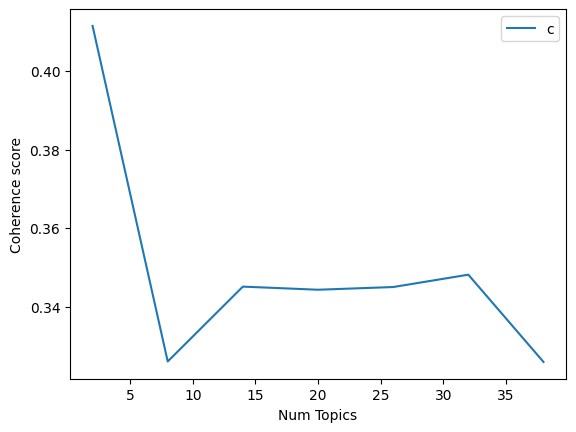

In [29]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**Running LDA using TF-IDF**

In [30]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word = dic, passes = 2, workers=4)

In [31]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.008*"desain" + 0.007*"fitur" + 0.007*"syariah" + 0.007*"spesifikasi" + 0.007*"karakter" + 0.007*"peran" + 0.006*"china" + 0.006*"partai" + 0.005*"mil" + 0.005*"kontribusi"


Topic: 1 Word: 0.008*"bijak" + 0.007*"purbaya" + 0.006*"listrik" + 0.005*"selatan" + 0.005*"alat" + 0.005*"olahraga" + 0.005*"serap" + 0.005*"bal" + 0.005*"foto" + 0.005*"rokok"


Topic: 2 Word: 0.012*"liverpool" + 0.011*"madrid" + 0.010*"menit" + 0.009*"bayern" + 0.009*"bola" + 0.008*"impor" + 0.007*"gawang" + 0.007*"bahlil" + 0.007*"poin" + 0.007*"real"


Topic: 3 Word: 0.021*"irak" + 0.012*"kluivert" + 0.011*"saudi" + 0.011*"arab" + 0.011*"kualifikasi" + 0.010*"poin" + 0.010*"patrick" + 0.009*"king" + 0.008*"garuda" + 0.007*"juara"


Topic: 4 Word: 0.016*"bayern" + 0.014*"foto" + 0.008*"presiden" + 0.008*"mobil" + 0.007*"layan" + 0.006*"bogor" + 0.006*"perempuan" + 0.006*"trofi" + 0.006*"instagram" + 0.006*"polisi"


Topic: 5 Word: 0.009*"wisata" + 0.008*"malam" + 0.006*"olahraga" + 0.006*"foto"

In [32]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=process_docs, dictionary=dic, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.4366435522243962


**classifying sample document using LDA Bag of Words model**

In [33]:
process_docs[document_num]

['pebasketsatria',
 'mudaavan',
 'seputramengaku',
 'kejut',
 'tim',
 'akuisisi',
 'persib',
 'positif',
 'ubah',
 'manajemen',
 'grup',
 'persib',
 'langkah',
 'ambil',
 'alih',
 'klub',
 'basket',
 'satria',
 'muda',
 'umum',
 'kali',
 'muncul',
 'akun',
 'sosial',
 'media',
 'klub',
 'satria',
 'muda',
 'persib',
 'senin',
 'akuisisi',
 'satria',
 'muda',
 'resmi',
 'pindah',
 'bandung',
 'jawa',
 'barat',
 'sisi',
 'main',
 'ubah',
 'pindah',
 'kejut',
 'basket',
 'cinta',
 'bola',
 'basket',
 'avan',
 'temu',
 'media',
 'center',
 'kemenpora',
 'rabu',
 'scroll',
 'continue',
 'with',
 'content',
 'segi',
 'manajemen',
 'holding',
 'pikir',
 'matang',
 'ubah',
 'pribadi',
 'main',
 'gampang',
 'ubah',
 'paksa',
 'biasa',
 'sisi',
 'positif',
 'organisasi',
 'individu',
 'berani',
 'langkah',
 'ubah',
 'sisi',
 'media',
 'cinta',
 'bola',
 'basket',
 'sisi',
 'positif',
 'ubah',
 'main',
 'lahir',
 'surabaya',
 'sebut',
 'ubah',
 'tantang',
 'satria',
 'muda',
 'satu',
 'wakil',
 '

In [34]:
for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))


Score: 0.9901076555252075	 Topic: 0.021*"foto" + 0.017*"muda" + 0.012*"liverpool" + 0.009*"saing" + 0.009*"karya"


In [35]:
lda_model[bow_corpus[document_num]]

[(8, 0.99010766)]

In [36]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(8, 0.9901076)]

In [37]:
lda_model.print_topic(index, 10)

'0.021*"foto" + 0.017*"muda" + 0.012*"liverpool" + 0.009*"saing" + 0.009*"karya" + 0.008*"ajang" + 0.008*"basket" + 0.007*"syariah" + 0.007*"bikin" + 0.007*"performa"'

**classifying sample document using LDA TF-IDF model**

In [38]:
for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))


Score: 0.6442279815673828	 Topic: 0.008*"basket" + 0.008*"nikah" + 0.007*"kandung" + 0.007*"korban" + 0.007*"tubuh"

Score: 0.17573833465576172	 Topic: 0.009*"wisata" + 0.008*"malam" + 0.006*"olahraga" + 0.006*"foto" + 0.006*"september"

Score: 0.13444708287715912	 Topic: 0.021*"irak" + 0.012*"kluivert" + 0.011*"saudi" + 0.011*"arab" + 0.011*"kualifikasi"

Score: 0.03898896276950836	 Topic: 0.012*"kendara" + 0.011*"mobil" + 0.010*"listrik" + 0.008*"fitur" + 0.008*"pekan"


**Testing model on unseen document**

In [ ]:
unseen_document = "abdillah"

bow_vector = dic.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key = lambda tup : tup[1], reverse=True):
  print('Score: {}\t Topik {}'.format(score, lda_model.print_topic(index, 5)))

Score: 0.5498747825622559	 Topik 0.030*"warna" + 0.019*"bayern" + 0.012*"pakai" + 0.012*"emas" + 0.011*"serta"
Score: 0.05003386363387108	 Topik 0.026*"mobil" + 0.012*"lindung" + 0.011*"umkm" + 0.011*"listrik" + 0.010*"baru"
Score: 0.05002230405807495	 Topik 0.020*"bank" + 0.020*"triliun" + 0.016*"china" + 0.014*"biaya" + 0.014*"purbaya"
Score: 0.05001581460237503	 Topik 0.021*"foto" + 0.017*"muda" + 0.012*"liverpool" + 0.009*"saing" + 0.009*"karya"
Score: 0.050012100487947464	 Topik 0.026*"irak" + 0.020*"madrid" + 0.018*"saudi" + 0.018*"arab" + 0.015*"kluivert"
Score: 0.05001060292124748	 Topik 0.013*"china" + 0.013*"bahlil" + 0.009*"negeri" + 0.009*"presiden" + 0.009*"dagang"
Score: 0.05000902712345123	 Topik 0.020*"poin" + 0.020*"irak" + 0.012*"king" + 0.011*"bal" + 0.009*"jawa"
Score: 0.05000784248113632	 Topik 0.024*"foto" + 0.022*"instagram" + 0.015*"undang" + 0.015*"kendara" + 0.009*"momen"
Score: 0.050007086247205734	 Topik 0.022*"kendara" + 0.015*"bebas" + 0.013*"nikah" + 0.01